### Client Analysis
- This notebook is ideal to understand schema and data within the databases stored in data/

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

import sqlite3
import pandas as pd
import json

/Users/daviddiaz/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Connect to the database
conn = sqlite3.connect('../data/client_1.db')

In [3]:
# Read tables into DataFrames
workouts = pd.read_sql_query("SELECT * FROM resistance_training_workouts", conn)
sessions = pd.read_sql_query("SELECT * FROM resistance_training_session_data", conn)
exercises = pd.read_sql_query("SELECT * FROM exercise", conn)

# Close connection
conn.close()

print(f"Loaded {len(workouts)} workouts, {len(sessions)} sessions, {len(exercises)} exercises")

Loaded 11 workouts, 161 sessions, 1178 exercises


## Schema Inspection

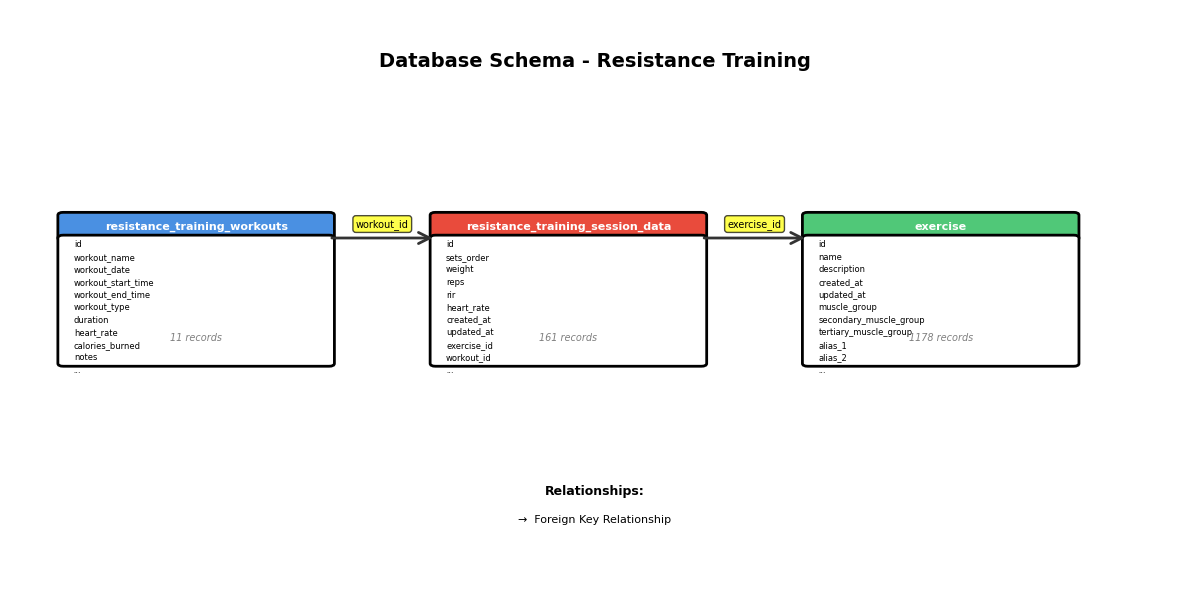

✅ Database diagram saved as 'database_schema.png'


In [4]:
# Create figure with adjusted dimensions
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, 11)  # Increased right margin
ax.set_ylim(0, 10)
ax.axis('off')

# Define table positions - adjusted for better spacing
tables = {
    'resistance_training_workouts': {'x': 0.5, 'y': 6, 'color': '#4A90E2'},
    'resistance_training_session_data': {'x': 4, 'y': 6, 'color': '#E94B3C'},
    'exercise': {'x': 7.5, 'y': 6, 'color': '#50C878'}
}

# Function to draw a table
def draw_table(ax, name, x, y, columns, color):
    # Table header
    header = FancyBboxPatch((x, y), 2.5, 0.4, boxstyle="round,pad=0.05", 
                            edgecolor='black', facecolor=color, linewidth=2)
    ax.add_patch(header)
    ax.text(x + 1.25, y + 0.2, name, ha='center', va='center', 
            fontsize=8, fontweight='bold', color='white')
    
    # Table body
    body_height = min(len(columns), 10) * 0.22  # Reduced spacing
    body = FancyBboxPatch((x, y - body_height), 2.5, body_height, 
                          boxstyle="round,pad=0.05", edgecolor='black', 
                          facecolor='white', linewidth=2)
    ax.add_patch(body)
    
    # Column names
    for i, col in enumerate(columns[:10]):  # Show first 10 columns
        ax.text(x + 0.1, y - 0.12 - (i * 0.22), col, 
                fontsize=6, va='center')
    
    if len(columns) > 10:
        ax.text(x + 0.1, y - 0.12 - (10 * 0.22), '...', 
                fontsize=6, va='center', style='italic')

# Draw tables with actual column names
draw_table(ax, 'resistance_training_workouts', 
          tables['resistance_training_workouts']['x'], 
          tables['resistance_training_workouts']['y'],
          workouts.columns.tolist(),
          tables['resistance_training_workouts']['color'])

draw_table(ax, 'resistance_training_session_data', 
          tables['resistance_training_session_data']['x'], 
          tables['resistance_training_session_data']['y'],
          sessions.columns.tolist(),
          tables['resistance_training_session_data']['color'])

draw_table(ax, 'exercise', 
          tables['exercise']['x'], 
          tables['exercise']['y'],
          exercises.columns.tolist(),
          tables['exercise']['color'])

# Draw relationships (arrows)
# Workout -> Session
arrow1 = FancyArrowPatch((3, 6), (4, 6), 
                        arrowstyle='->', mutation_scale=20, 
                        linewidth=2, color='#333')
ax.add_patch(arrow1)
ax.text(3.5, 6.2, 'workout_id', fontsize=7, ha='center', 
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Session -> Exercise
arrow2 = FancyArrowPatch((6.5, 6), (7.5, 6), 
                        arrowstyle='->', mutation_scale=20, 
                        linewidth=2, color='#333')
ax.add_patch(arrow2)
ax.text(7, 6.2, 'exercise_id', fontsize=7, ha='center',
        bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))

# Add title
ax.text(5.5, 9, 'Database Schema - Resistance Training', 
        fontsize=14, fontweight='bold', ha='center')

# Add legend
ax.text(5.5, 1.5, 'Relationships:', fontsize=9, fontweight='bold', ha='center')
ax.text(5.5, 1.0, '→  Foreign Key Relationship', fontsize=8, ha='center')

# Add record counts
ax.text(1.75, 4.2, f'{len(workouts)} records', fontsize=7, ha='center', 
        style='italic', color='gray')
ax.text(5.25, 4.2, f'{len(sessions)} records', fontsize=7, ha='center', 
        style='italic', color='gray')
ax.text(8.75, 4.2, f'{len(exercises)} records', fontsize=7, ha='center', 
        style='italic', color='gray')

plt.tight_layout()
plt.savefig('../scripts/database_schema.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("✅ Database diagram saved as 'database_schema.png'")

### Workout Analysis

In [5]:
workouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11 non-null     int64 
 1   workout_name        11 non-null     object
 2   workout_date        11 non-null     object
 3   workout_start_time  11 non-null     object
 4   workout_end_time    11 non-null     object
 5   workout_type        11 non-null     object
 6   duration            11 non-null     int64 
 7   heart_rate          0 non-null      object
 8   calories_burned     0 non-null      object
 9   notes               0 non-null      object
 10  created_at          11 non-null     object
 11  updated_at          11 non-null     object
 12  client_id_id        11 non-null     int64 
 13  trainer_id          0 non-null      object
 14  prebuilt_workout    11 non-null     int64 
 15  is_assigned         11 non-null     int64 
 16  summary             1 non-nu

### Findings
- 11 Workouts
- About half of the columns have nulls

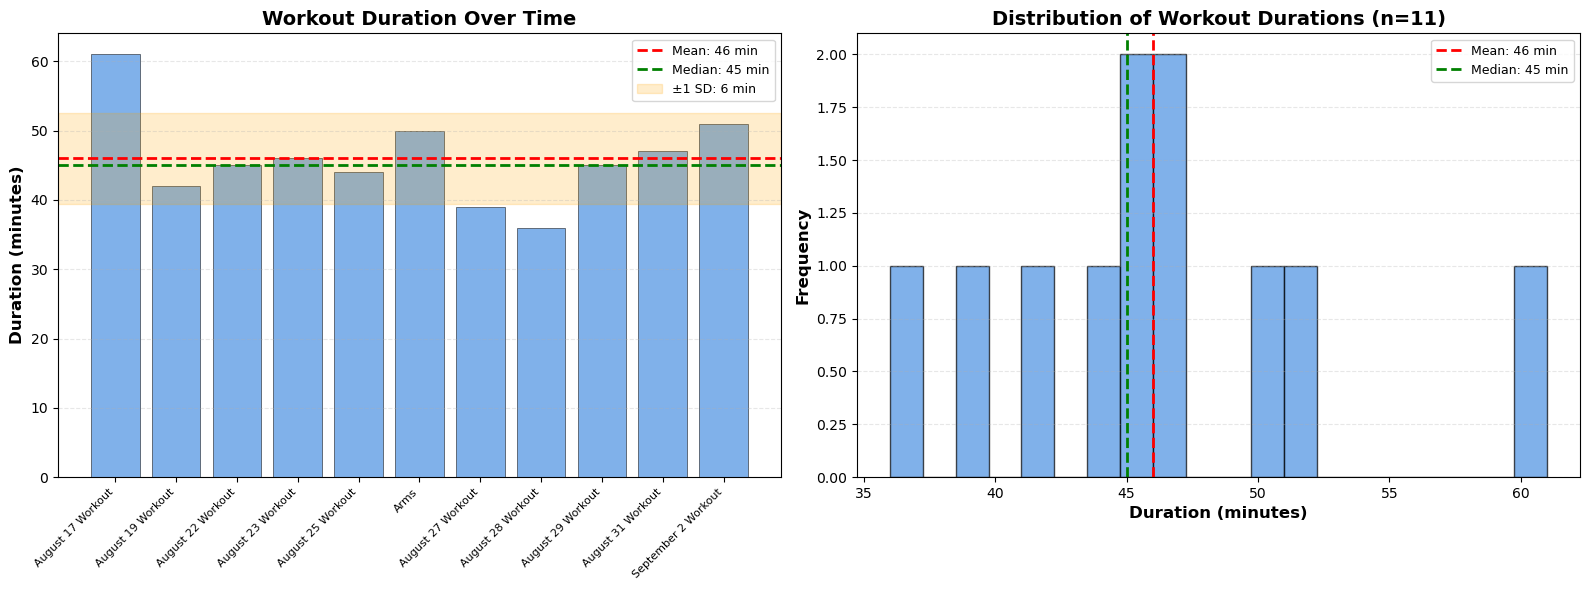

WORKOUT DURATION STATISTICS
Total Workouts:      11
Mean Duration:       46 minutes
Median Duration:     45 minutes
Std Deviation:       6 minutes
Min Duration:        36 minutes
Max Duration:        61 minutes
25th Percentile:     43 minutes
75th Percentile:     48 minutes
Range:               25 minutes


In [6]:
workouts_with_duration = workouts[workouts['duration'].notna()].copy()
workouts_with_duration['duration_minutes'] = workouts_with_duration['duration']

# Calculate statistics
mean_duration = workouts_with_duration['duration_minutes'].mean()
median_duration = workouts_with_duration['duration_minutes'].median()
std_duration = workouts_with_duration['duration_minutes'].std()
min_duration = workouts_with_duration['duration_minutes'].min()
max_duration = workouts_with_duration['duration_minutes'].max()
q1 = workouts_with_duration['duration_minutes'].quantile(0.25)
q3 = workouts_with_duration['duration_minutes'].quantile(0.75)

# Sort by date
if 'workout_date' in workouts_with_duration.columns:
    workouts_sorted = workouts_with_duration.sort_values('workout_date').head(20)
elif 'created_at' in workouts_with_duration.columns:
    workouts_sorted = workouts_with_duration.sort_values('created_at').head(20)
else:
    workouts_sorted = workouts_with_duration.head(20)

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# LEFT: Bar chart (original)
bars = ax1.bar(range(len(workouts_sorted)), 
               workouts_sorted['duration_minutes'],
               color='#4A90E2',
               edgecolor='black',
               linewidth=0.5,
               alpha=0.7)

# Add mean line
ax1.axhline(y=mean_duration, color='red', linestyle='--', linewidth=2, label=f'Mean: {int(mean_duration)} min')
ax1.axhline(y=median_duration, color='green', linestyle='--', linewidth=2, label=f'Median: {int(median_duration)} min')
ax1.axhspan(mean_duration - std_duration, mean_duration + std_duration, 
            alpha=0.2, color='orange', label=f'±1 SD: {int(std_duration)} min')

if 'workout_name' in workouts_sorted.columns:
    ax1.set_xticks(range(len(workouts_sorted)))
    ax1.set_xticklabels(workouts_sorted['workout_name'], rotation=45, ha='right', fontsize=8)
else:
    ax1.set_xlabel('Workout Index', fontsize=12)

ax1.set_ylabel('Duration (minutes)', fontsize=12, fontweight='bold')
ax1.set_title('Workout Duration Over Time', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
ax1.legend(loc='upper right', fontsize=9)

# RIGHT: Histogram
ax2.hist(workouts_with_duration['duration_minutes'], 
         bins=20, 
         color='#4A90E2', 
         edgecolor='black', 
         alpha=0.7)

# Add mean and median lines
ax2.axvline(x=mean_duration, color='red', linestyle='--', linewidth=2, label=f'Mean: {int(mean_duration)} min')
ax2.axvline(x=median_duration, color='green', linestyle='--', linewidth=2, label=f'Median: {int(median_duration)} min')

ax2.set_xlabel('Duration (minutes)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title(f'Distribution of Workout Durations (n={len(workouts_with_duration)})', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3, linestyle='--')
ax2.legend(loc='upper right', fontsize=9)

plt.tight_layout()
plt.savefig('../scripts/workouts_duration_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print("=" * 50)
print("WORKOUT DURATION STATISTICS")
print("=" * 50)
print(f"Total Workouts:      {len(workouts_with_duration)}")
print(f"Mean Duration:       {int(mean_duration)} minutes")
print(f"Median Duration:     {int(median_duration)} minutes")
print(f"Std Deviation:       {int(std_duration)} minutes")
print(f"Min Duration:        {int(min_duration)} minutes")
print(f"Max Duration:        {int(max_duration)} minutes")
print(f"25th Percentile:     {int(q1)} minutes")
print(f"75th Percentile:     {int(q3)} minutes")
print(f"Range:               {int(max_duration - min_duration)} minutes")
print("=" * 50)

## Session Data

In [7]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    161 non-null    int64  
 1   sets_order            161 non-null    int64  
 2   weight                161 non-null    float64
 3   reps                  161 non-null    object 
 4   rir                   161 non-null    float64
 5   heart_rate            0 non-null      object 
 6   created_at            161 non-null    object 
 7   updated_at            161 non-null    object 
 8   exercise_id           161 non-null    int64  
 9   workout_id            161 non-null    int64  
 10  group_id              161 non-null    int64  
 11  set_structure         161 non-null    int64  
 12  duration_or_velocity  161 non-null    int64  
 13  rir_or_rpe            161 non-null    int64  
 14  weight_unit           161 non-null    int64  
 15  duration              4

## Initial Questions:
### 1. Volume Analysis
- What is the total volume (sets x reps x weight) per workout?
- How does volume change over time for specific exercises?
- Which muscle groups have the highest/lowest training volume?
- What's the volume distribution across different equipment types?
- Are there any volume trends (increasing/decreasing/plateaus)?

### 2. Intensity Analysis
- What is the average weigth lifted per exercise over time?
- What is the RPE/RIR distribution?
- How does intensity vary by workout type?
- What percentage of sets are performed at a high vs low intensity?
- Is there a relationship between volume and intensity?

### 3. Frequency Analysis
- How often is each exercise performed per week/month?
- What is the training frequency per each muscle group?
- Which equipment is used most frequently?
- Are there gaps/rest periods between training sessions?
- What's the distribution of workouts per week?

### 4.Progress Tracking
- Is there progressive overlaod happening (weight/reps increasing)?
- Which exercises show the most improvement?
- Are there any performance plateause or regressions?
- What's the rate of strength gain per exercise?

### 5. Workout Composisition
- How many exercise per workout on average?
- What's the distribution of sets per exercise?
- What's the rep range distribution (low/medium/high)?
- How long are rest periods between sets?

### 6. Muscle Group Balance
- Is there balanced training across muscle groups?
- Are there any overworked or underworked muscle groups?
- What's the distribution?
- Any imbalances? 

### Findings
- Note fields an hr have zero data points

In [8]:
# Remove Uneeded Columns
sessions_df = sessions.drop(columns=['heart_rate', 'client_notes', 'trainer_notes'])

In [9]:
# Initial Summary Statistics 
sessions_df.describe()

,id,sets_order,weight,rir,exercise_id,workout_id,group_id,set_structure,duration_or_velocity,rir_or_rpe,weight_unit,duration,exercise_order
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.0,161.0,161.0,40.000000,161.000000
mean,579103.000000,1.478261,92.680124,1.763975,292.602484,77.186335,2.515528,0.037267,0.0,0.0,0.0,-0.050000,1.459627
std,46.620811,1.124094,62.436131,0.762525,210.709376,3.288626,1.328089,0.190007,0.0,0.0,0.0,0.220721,1.254959
min,579023.000000,0.000000,-1.000000,-1.000000,18.000000,72.000000,1.000000,0.000000,0.0,0.0,0.0,-1.000000,0.000000
25%,579063.000000,0.000000,50.000000,2.000000,96.000000,74.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
50%,579103.000000,1.000000,80.000000,2.000000,259.000000,77.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000
75%,579143.000000,2.000000,130.000000,2.000000,338.000000,80.000000,3.000000,0.000000,0.0,0.0,0.0,0.000000,2.000000
max,579183.000000,4.000000,360.000000,3.000000,689.000000,82.000000,6.000000,1.000000,0.0,0.0,0.0,0.000000,5.000000


### Findings
- All duration_or_velocity are 0; therefore, duration field holds duration
- All rir_or_rpe are 0; therefore, rir holds rir
- All weight_unit are 0; therefore, weight is lbs

### Analyze Exercises (enum table)

In [10]:
exercises.columns.tolist()

['id',
 'name',
 'description',
 'created_at',
 'updated_at',
 'muscle_group',
 'secondary_muscle_group',
 'tertiary_muscle_group',
 'alias_1',
 'alias_2',
 'instructions',
 'urls',
 'equipment',
 'image_1',
 'image_2',
 'complexity_level',
 'contraindications',
 'fatigue_level',
 'joint_emphasis',
 'movement_type',
 'plane_of_motion',
 'risk_level']

### Merge data from exercise to Session data

In [11]:
# Merge sessions with exercise data on exercise_id
sessions_enriched = sessions_df.merge(
    exercises[['id', 'name', 'muscle_group', 'equipment', 'complexity_level', 
               'contraindications', 'fatigue_level', 'joint_emphasis', 
               'movement_type', 'plane_of_motion', 'risk_level']], 
    left_on='exercise_id', 
    right_on='id', 
    how='left'
)

# Drop the redundant 'id' column from exercises
# sessions_enriched = sessions_enriched.drop('id', axis=1)

print(f"✅ Enriched sessions: {len(sessions_enriched)} rows")
print(f"Columns added: {sessions_enriched.columns.tolist()}")
print(f"\nSample data:")
print(sessions_enriched[['exercise_id', 'name', 'muscle_group', 'equipment']].head())

✅ Enriched sessions: 161 rows
Columns added: ['id_x', 'sets_order', 'weight', 'reps', 'rir', 'created_at', 'updated_at', 'exercise_id', 'workout_id', 'group_id', 'set_structure', 'duration_or_velocity', 'rir_or_rpe', 'weight_unit', 'duration', 'exercise_order', 'completed_at', 'id_y', 'name', 'muscle_group', 'equipment', 'complexity_level', 'contraindications', 'fatigue_level', 'joint_emphasis', 'movement_type', 'plane_of_motion', 'risk_level']

Sample data:
   exercise_id                       name muscle_group           equipment
0          207         Machine Hack Squat         Legs  Hack Squat Machine
1          207         Machine Hack Squat         Legs  Hack Squat Machine
2          207         Machine Hack Squat         Legs  Hack Squat Machine
3          207         Machine Hack Squat         Legs  Hack Squat Machine
4          564  Smith Machine Split Squat         Legs       Smith Machine


In [12]:
sessions_enriched

,id_x,sets_order,weight,reps,rir,created_at,updated_at,exercise_id,workout_id,group_id,...,name,muscle_group,equipment,complexity_level,contraindications,fatigue_level,joint_emphasis,movement_type,plane_of_motion,risk_level
0,579023,0,140.0,10,2.0,2025-08-17 23:17:07.116154+00:00,2025-08-17 23:17:07.116161+00:00,207,72,1,...,Machine Hack Squat,Legs,Hack Squat Machine,intermediate,"[""knee pain"", ""lower back pain""]",medium,"[""knees"", ""hips""]",squat,Sagittal,Moderate
1,579024,1,140.0,12,2.0,2025-08-17 23:17:07.126631+00:00,2025-08-17 23:17:07.126640+00:00,207,72,1,...,Machine Hack Squat,Legs,Hack Squat Machine,intermediate,"[""knee pain"", ""lower back pain""]",medium,"[""knees"", ""hips""]",squat,Sagittal,Moderate
2,579025,2,180.0,12,2.0,2025-08-17 23:17:07.133840+00:00,2025-08-17 23:17:07.133847+00:00,207,72,1,...,Machine Hack Squat,Legs,Hack Squat Machine,intermediate,"[""knee pain"", ""lower back pain""]",medium,"[""knees"", ""hips""]",squat,Sagittal,Moderate
3,579026,3,180.0,12,2.0,2025-08-17 23:17:07.137824+00:00,2025-08-17 23:17:07.137831+00:00,207,72,1,...,Machine Hack Squat,Legs,Hack Squat Machine,intermediate,"[""knee pain"", ""lower back pain""]",medium,"[""knees"", ""hips""]",squat,Sagittal,Moderate
4,579027,0,90.0,010,2.0,2025-08-17 23:17:07.196691+00:00,2025-08-17 23:17:07.196698+00:00,564,72,2,...,Smith Machine Split Squat,Legs,Smith Machine,intermediate,knee pain,high,"[""knees"", ""hips""]",split squat,Sagittal,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,579179,1,47.5,12,2.0,2025-09-02 16:23:34.893517+00:00,2025-09-02 16:23:34.893531+00:00,318,82,5,...,Dumbbell Bent Over Row (Single Arm),Upper Back,Dumbbell,intermediate,"[""Lower back pain"", ""hamstring tightness"", ""sh...",medium,"[""Shoulders"", ""Elbows"", ""Spine"", ""Hips""]",pull,Sagittal,Moderate
157,579180,2,52.5,12,2.0,2025-09-02 16:23:34.900719+00:00,2025-09-02 16:23:34.900734+00:00,318,82,5,...,Dumbbell Bent Over Row (Single Arm),Upper Back,Dumbbell,intermediate,"[""Lower back pain"", ""hamstring tightness"", ""sh...",medium,"[""Shoulders"", ""Elbows"", ""Spine"", ""Hips""]",pull,Sagittal,Moderate
158,579181,0,22.5,13,2.0,2025-09-02 16:23:34.974626+00:00,2025-09-02 16:23:34.974635+00:00,72,82,5,...,Dumbbell Spider Curl,Biceps,Dumbbell,intermediate,"[""Elbow pain (tendinitis)"", ""wrist pain""]",low,"[""Elbows"", ""Wrists""]",pull,Sagittal,Low
159,579182,1,22.5,12,2.0,2025-09-02 16:23:34.979516+00:00,2025-09-02 16:23:34.979527+00:00,72,82,5,...,Dumbbell Spider Curl,Biceps,Dumbbell,intermediate,"[""Elbow pain (tendinitis)"", ""wrist pain""]",low,"[""Elbows"", ""Wrists""]",pull,Sagittal,Low


# Distinct Values of Categorical Data

In [13]:
cols = ['name', 'muscle_group', 'equipment', 'complexity_level', 'contraindications', 
        'fatigue_level', 'joint_emphasis', 'movement_type', 'plane_of_motion', 'risk_level']

analysis_df = sessions_enriched[cols]

print("=" * 80)
print("CATEGORICAL ANALYSIS OF EXERCISE DATA")
print("=" * 80)

for col in cols:
    print(f"\n{'='*80}")
    print(f"Column: {col.upper()}")
    print(f"{'='*80}")
    
    # Basic stats
    print(f"Total records: {len(analysis_df)}")
    print(f"Non-null values: {analysis_df[col].notna().sum()}")
    print(f"Null values: {analysis_df[col].isna().sum()}")
    print(f"Unique values: {analysis_df[col].nunique()}")
    
    # Value counts
    print(f"\nValue Distribution:")
    value_counts = analysis_df[col].value_counts()
    for value, count in value_counts.items():
        percentage = (count / len(analysis_df)) * 100
        print(f"  {value}: {count} ({percentage:.2f}%)")
    
    # If there are too many unique values, show top 20
    if len(value_counts) > 20:
        print(f"\n  ... showing top 20 of {len(value_counts)} unique values")

print("\n" + "=" * 80)
print("SUMMARY")
print("=" * 80)
analysis_df.describe(include='all')

CATEGORICAL ANALYSIS OF EXERCISE DATA

Column: NAME
Total records: 161
Non-null values: 161
Null values: 0
Unique values: 32

Value Distribution:
  Machine Hack Squat: 8 (4.97%)
  Machine Lateral Raise: 8 (4.97%)
  EZ Bar Preacher Curl: 8 (4.97%)
  Barbell Bench Press: 8 (4.97%)
  Machine Seated Leg Curl (Matrix): 8 (4.97%)
  Barbell Squat: 8 (4.97%)
  Iso-Lateral High Row (Hammer Strength): 8 (4.97%)
  Hanging Leg Raise: 8 (4.97%)
  Dumbbell Bench Press: 7 (4.35%)
  Machine Leg Extension (Hammer Strength): 5 (3.11%)
  Barbell Shoulder Press (Seated): 4 (2.48%)
  Cable Seated Row (Matrix): 4 (2.48%)
  Cable Lat Pulldown: 4 (2.48%)
  Machine Leg Press: 4 (2.48%)
  Machine Lat Pulldown: 4 (2.48%)
  Dumbbell Bench Press (Incline): 4 (2.48%)
  Machine Rear Delt: 4 (2.48%)
  Machine Chest Fly: 4 (2.48%)
  Cable Face Pull: 4 (2.48%)
  Dumbbell Skullcrusher: 4 (2.48%)
  Cable Hammer Curl (Rope): 4 (2.48%)
  Machine Tricep Extension: 4 (2.48%)
  Cable Pushdown (Single Arm): 4 (2.48%)
  Smith M

,name,muscle_group,equipment,complexity_level,contraindications,fatigue_level,joint_emphasis,movement_type,plane_of_motion,risk_level
count,161,161,161,161,161,161,161,161,161,161
unique,32,11,22,3,27,3,18,9,3,2
top,Machine Hack Squat,Chest,Barbell,intermediate,"[""knee pain"", ""lower back pain""]",medium,"[""Shoulders"", ""Elbows""]",pull,Sagittal,Low
freq,8,31,24,85,12,102,28,54,129,83
